In [120]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import Proj, transform
import folium
import matplotlib.font_manager as fm
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
import matplotlib.colors as mcolor
import mapclassify as mc
%matplotlib inline

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10,10)

In [23]:
# ArcGIS or GIS에서는 SHP파일만 가져와서 읽지만, python은 .dbf, .shx파일도 함께 있어야힌다. 
seoul_file = "4개지역_행정동.SHP"
seoul = gpd.read_file(seoul_file)
#seoul.columns
dague2 = seoul[seoul.SIDO_NM == '대구광역시']
seoul2 = seoul[seoul.SIDO_NM == '서울특별시']
dague = seoul[np.logical_and(seoul.SGNG_NM == '중구',seoul.SIDO_NM == '대구광역시')]
seoul = seoul[np.logical_and(seoul.SGNG_NM == '중구',seoul.SIDO_NM == '서울특별시')]

#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
seoul

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
54,2020,1114059000,광희동,11,서울특별시,11140,중구,741195.05,5359.72,127.003692947513,37.5651771776684,"POLYGON ((956871.822 1951982.161, 956868.441 1..."
55,2020,1114062500,다산동,11,서울특별시,11140,중구,521341.19,4124.64,127.008419495876,37.5550340631202,"POLYGON ((957055.236 1951313.304, 956816.646 1..."
56,2020,1114066500,동화동,11,서울특별시,11140,중구,328213.50,2994.67,127.01864830948,37.5606737789162,"POLYGON ((957906.335 1951370.632, 957902.853 1..."
57,2020,1114055000,명동,11,서울특별시,11140,중구,1053644.29,6472.97,126.984204994077,37.5635855225755,"POLYGON ((955040.008 1952214.778, 955040.007 1..."
58,2020,1114052000,소공동,11,서울특별시,11140,중구,893419.62,4367.79,126.974020056852,37.564293390876,"POLYGON ((954272.149 1951850.514, 954267.845 1..."
59,2020,1114065000,신당5동,11,서울특별시,11140,중구,321347.03,2668.71,127.021837599297,37.5636273781666,"POLYGON ((958209.264 1951753.867, 958200.407 1..."
60,2020,1114061500,신당동,11,서울특별시,11140,중구,544408.19,3475.62,127.013671065263,37.5657239453701,"POLYGON ((957441.172 1951909.880, 957412.450 1..."
61,2020,1114063500,약수동,11,서울특별시,11140,중구,490077.51,3896.34,127.010300656641,37.5501699450313,"POLYGON ((957294.052 1950539.100, 957282.692 1..."
62,2020,1114060500,을지로동,11,서울특별시,11140,중구,599091.52,4524.58,126.996386576655,37.5665846436975,"POLYGON ((956318.685 1952364.497, 956318.681 1..."
63,2020,1114058000,장충동,11,서울특별시,11140,중구,1310554.91,7373.04,127.001637316895,37.5558643497356,"POLYGON ((956708.730 1951343.840, 956705.393 1..."


In [3]:
new_col = []
for row in seoul.iterrows():
    new_col.append([row[1]['Y_COORD'], row[1]['X_COORD']])
    
len(new_col)

seoul['long_la'] = new_col

In [4]:
map1 =folium.Map(location=[37.566535, 126.97796919999996], zoom_start=15)

for row in seoul.iterrows():
    folium.CircleMarker(row[1]['long_la'], popup=row[1]['AREA']).add_to(map1)

In [5]:
map1

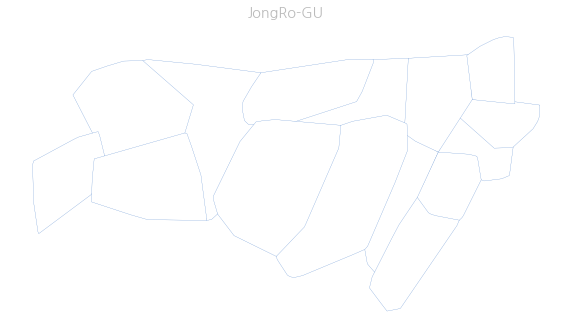

In [6]:
ax = seoul.convex_hull.plot(color='white', edgecolor="b")
ax.set_title("JongRo-GU")
ax.set_axis_off()
plt.show()

<AxesSubplot:>

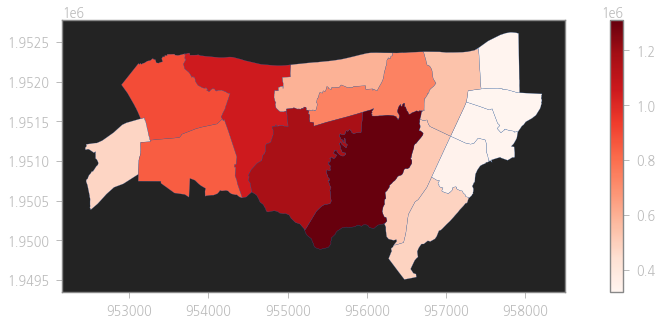

In [7]:
#seoul.plot(edgecolor = 'w', cmap = 'Reds', columns = 'AREA')
seoul.plot(column = 'AREA', cmap = 'Reds' ,edgecolor = 'b', legend = True, figsize= (16,5))

<ipython-input-33-51fac1aeb358>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=seoul['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color = 'red')


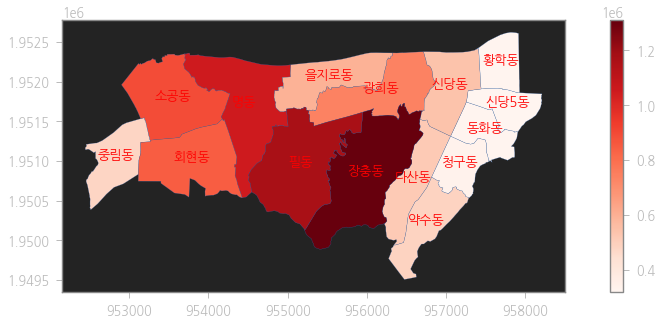

In [33]:
ax = seoul.plot(column = 'AREA', cmap = 'Reds' ,edgecolor = 'b', legend = True, figsize= (16,5))
for i, geo in seoul.centroid.iteritems():
    ax.annotate(s=seoul['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color = 'red')
    ax.figure
plt.show()

In [9]:
path = '/usr/share/fonts/truetype/dejavu/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

<ipython-input-34-9636649a5caa>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=seoul['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )


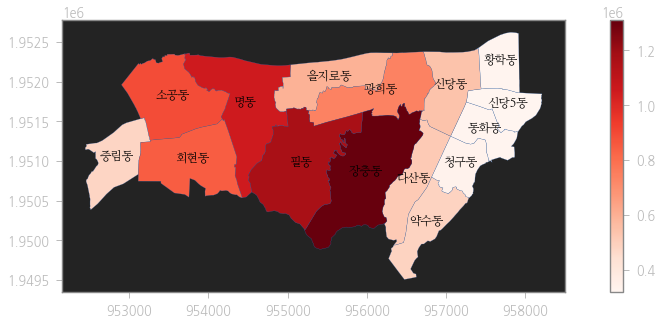

In [34]:
#plt.plot()
#plt.title('가격변동 추이', fontproperties=fontprop)
#plt.ylabel('가격', fontproperties=fontprop)
#plt.show()
ax = seoul.plot(column = 'AREA', cmap = 'Reds' ,edgecolor = 'b', legend = True, figsize= (16,5))
for i, geo in seoul.centroid.iteritems():
    ax.annotate(s=seoul['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )
    ax.figure
plt.show()

<ipython-input-35-34cc57bbcfaf>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=dague['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )


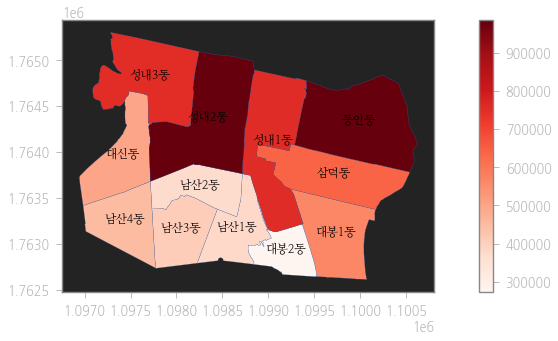

In [35]:
ax = dague.plot(column = 'AREA', cmap = 'Reds' ,edgecolor = 'b', legend = True, figsize= (16,5))
for i, geo in dague.centroid.iteritems():
    ax.annotate(s=dague['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )
    ax.figure
plt.show()

<ipython-input-155-341af2e00690>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=dague2['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )


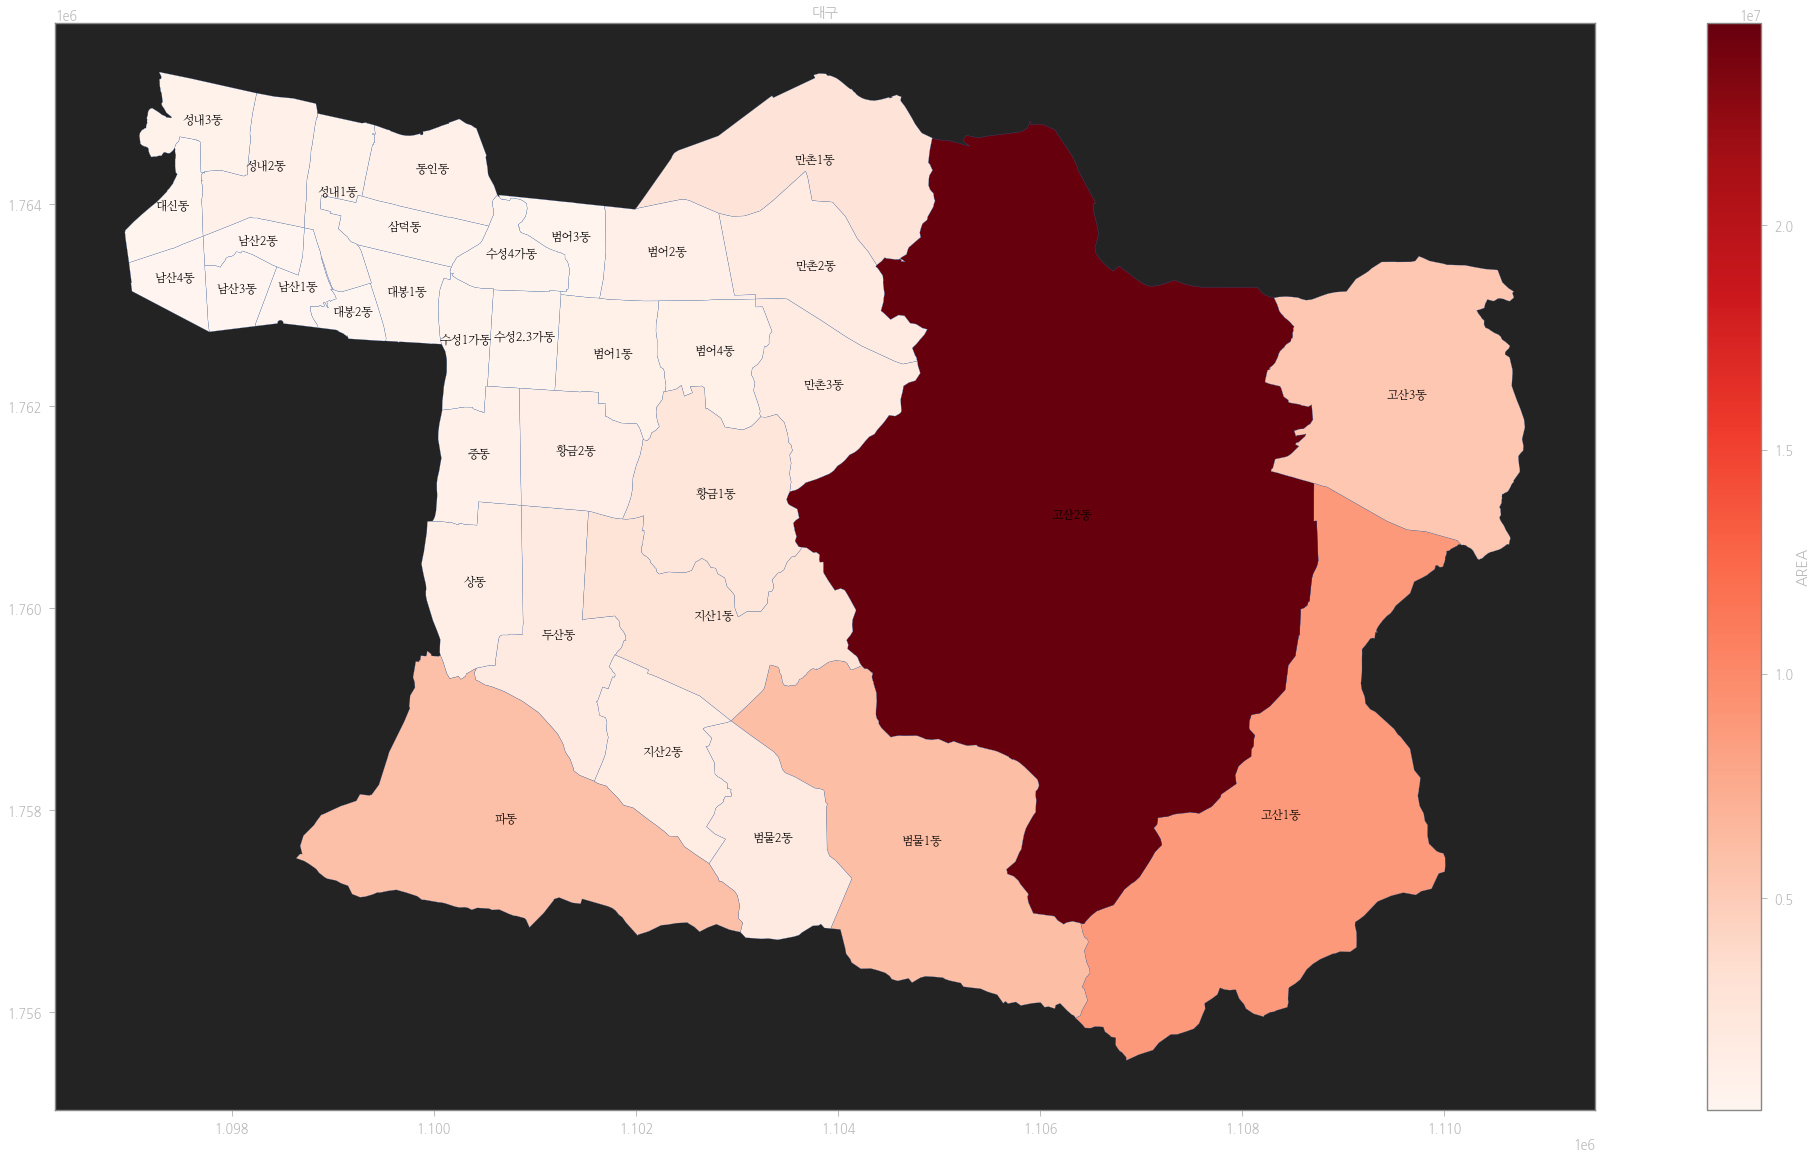

In [155]:
#fig, az = plt.subplots(10,figsize = (4.5,10))
ax = dague2.plot(column = 'AREA', cmap = 'Reds' ,edgecolor = 'b', legend = True, figsize= (40,20), legend_kwds = {'label' : 'AREA'})
ax.set_title('대구')
for i, geo in dague2.centroid.iteritems():
    ax.annotate(s=dague2['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )
    ax.figure
plt.show()

# 완성본

<ipython-input-156-ab4138e54bf5>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=seoul2['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )


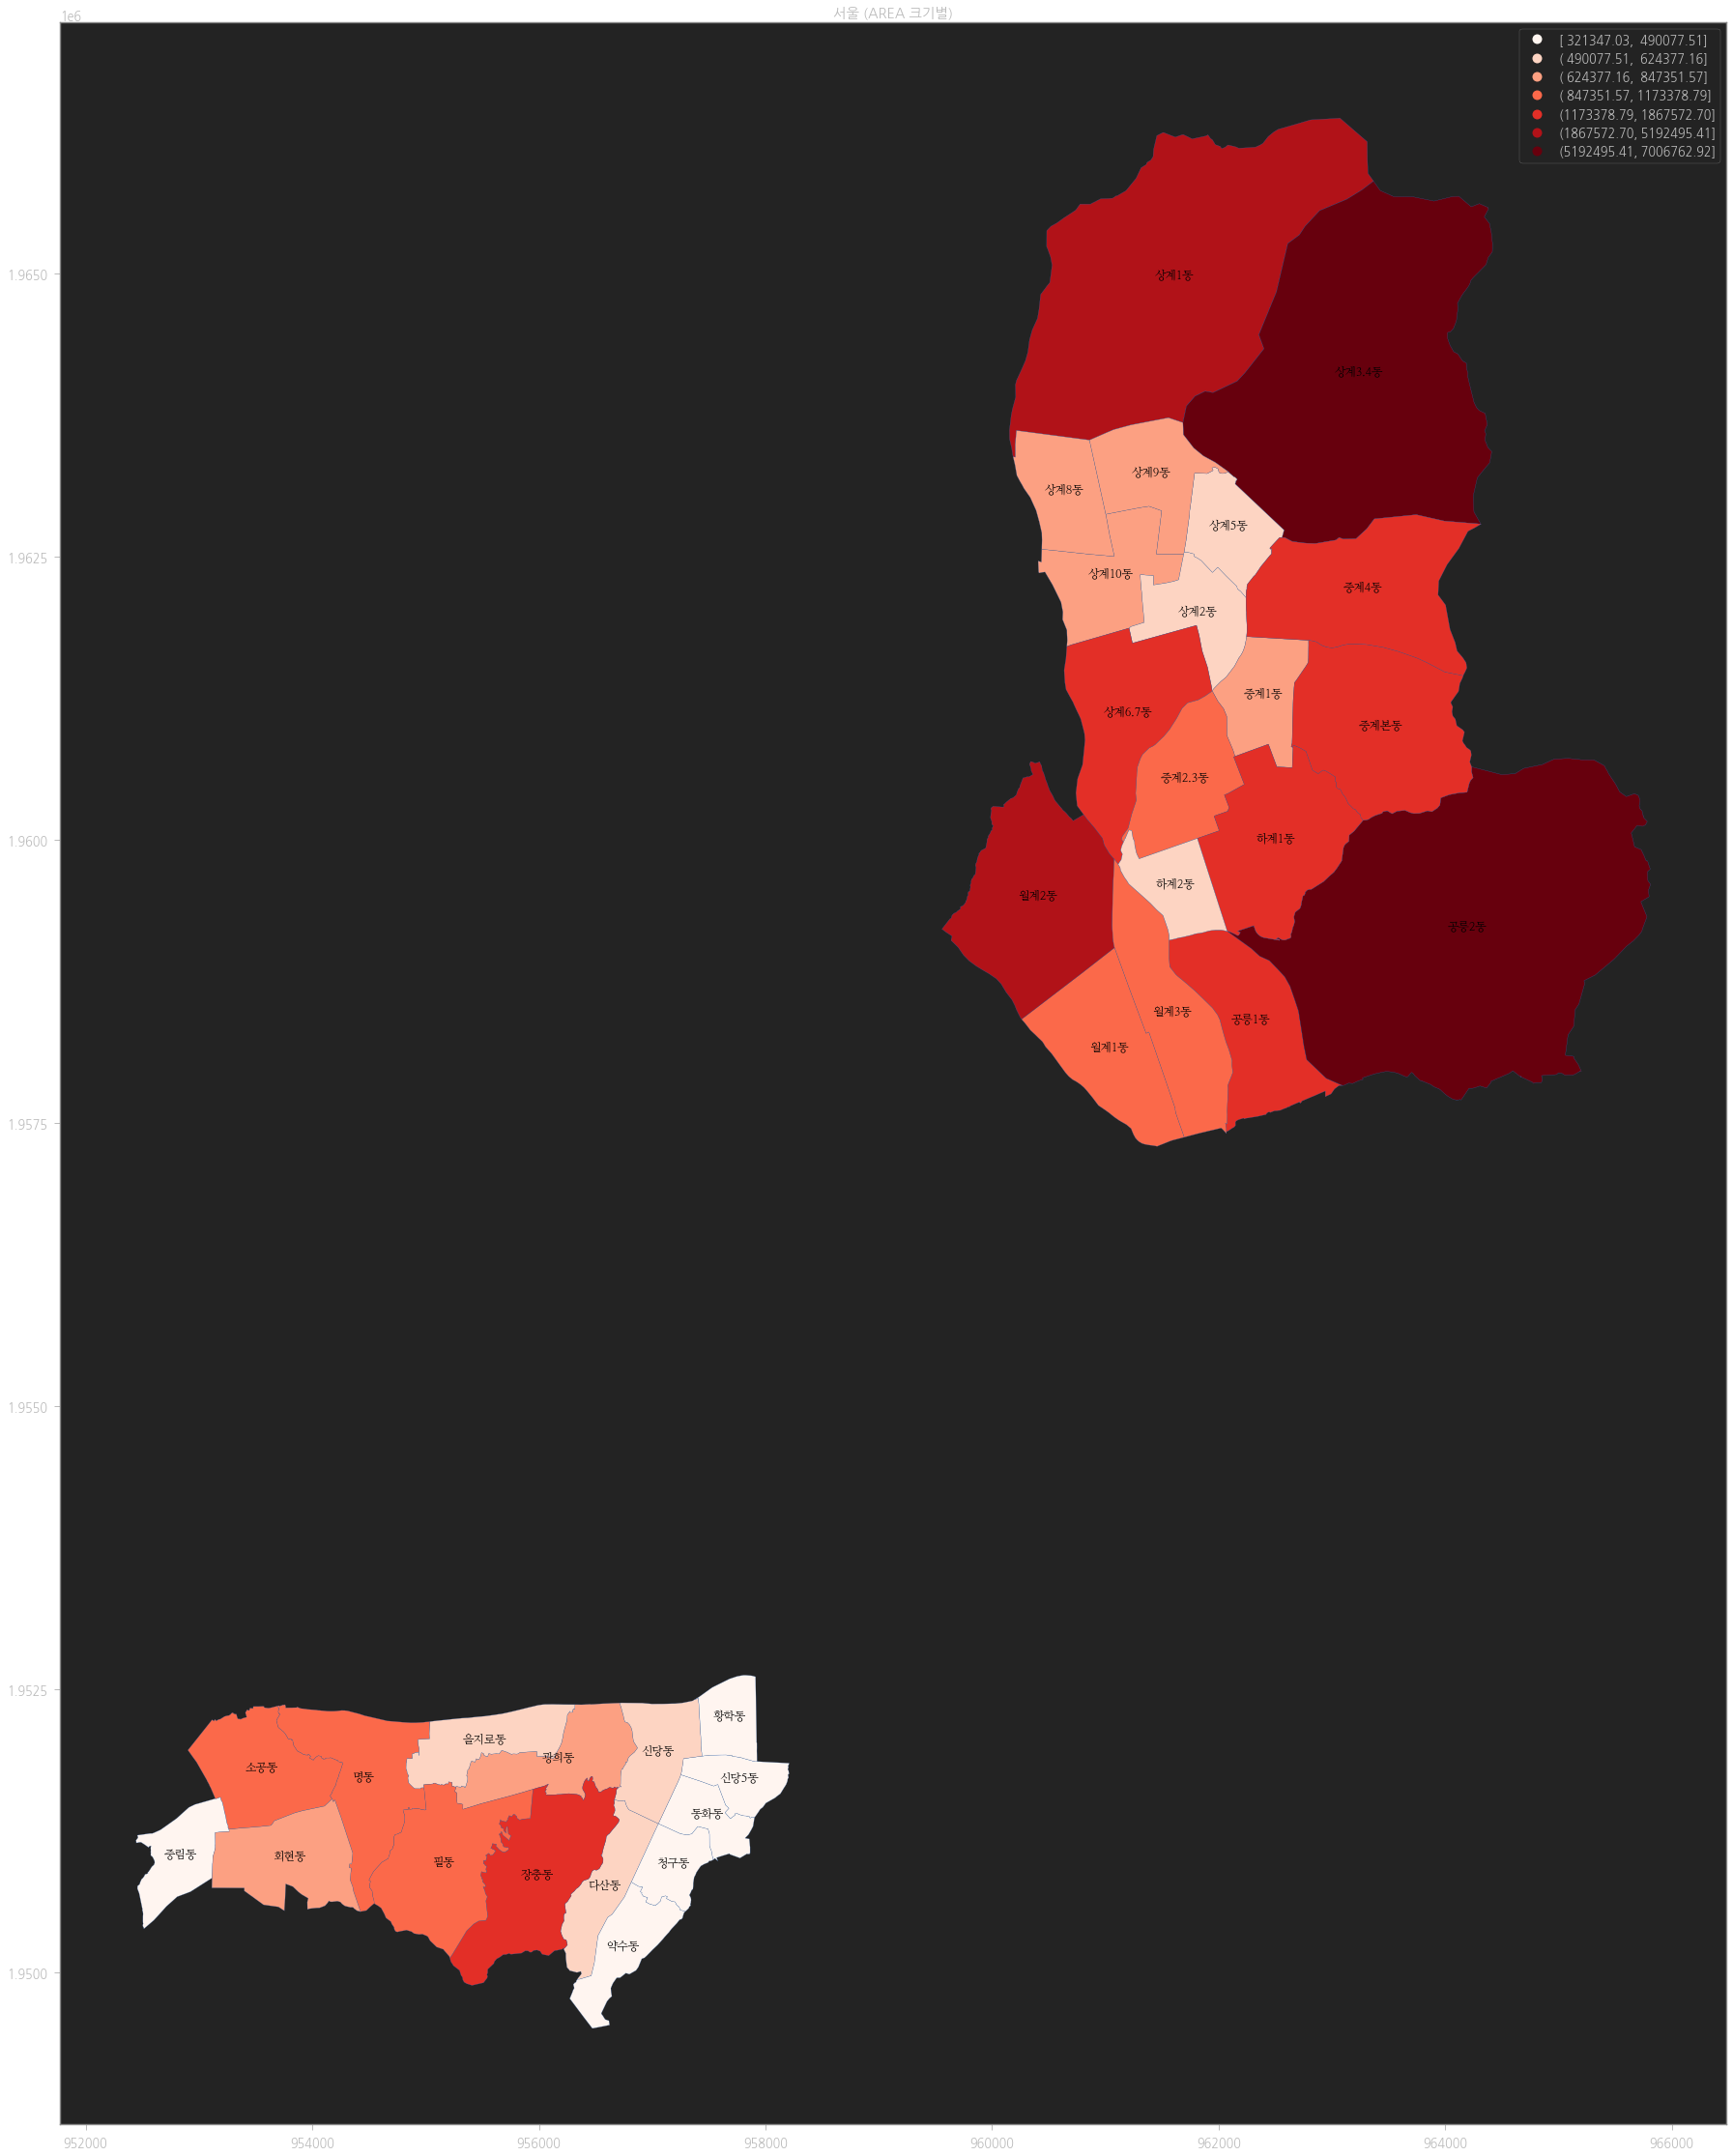

In [156]:
scheme = mc.Quantiles(seoul2['AREA'], k = 7)
ax = seoul2.plot(column = 'AREA', scheme = 'User_Defined' , cmap = 'Reds' ,edgecolor = 'b', legend = True, figsize= (60,40), classification_kwds = dict(bins=[490077.51, 624377.16, 847351.57, 1173378.79, 1867572.70, 5192495.41]))
ax.set_title('서울 (AREA 크기별)')

for i, geo in seoul2.centroid.iteritems():
    ax.annotate(s=seoul2['HDONG_NM'][i], xy=[geo.x, geo.y], horizontalalignment = 'center',color='black', fontproperties = fontprop, )
    ax.figure
plt.show()